## Visualize the graph of Tensor operations

In [1]:
# You must have installed graphviz program in your computer: https://graphviz.org/download/
# pip install graphviz
from graphviz import Digraph

In [2]:
import deeplib
from deeplib import nn

In [19]:
def trace(root):
    nodes, edges = set(), set()
    def build(n):
        if n not in nodes:
            nodes.add(n)
            for child in n._children:
                edges.add((child, n))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label=f"tensor={n} | grad={n.grad}", shape='record')
        if n._operation:
            dot.node(name=str(id(n)) + n._operation, label=n._operation)
            dot.edge(str(id(n)) + n._operation, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._operation)
    
    return dot

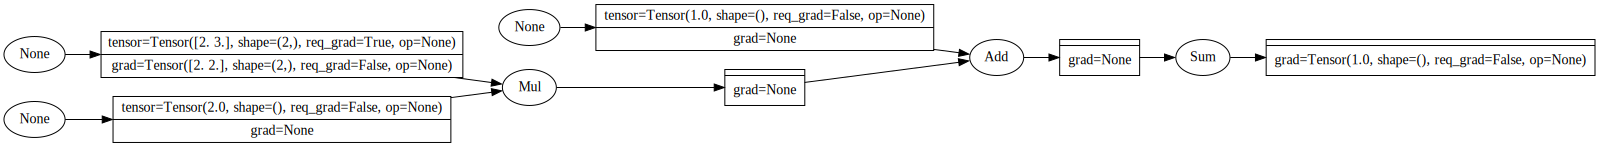

In [20]:
# a very simple example
x = deeplib.tensor([2.0, 3.0], requires_grad=True)
y = (x * 2 + 1)
y = y.sum()
y.backward()
draw_dot(y)

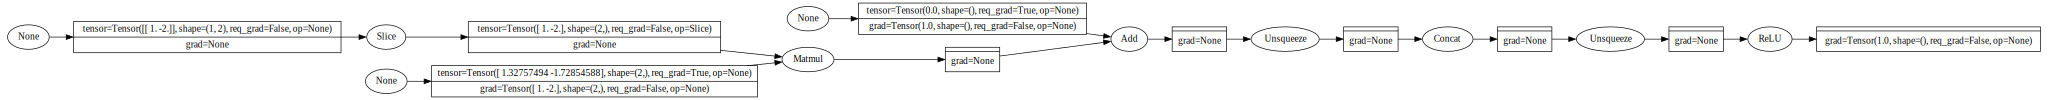

In [15]:
# a simple 2D neuron
import random

random.seed(1337)
n = nn.Neuron(2)
x = deeplib.tensor([[1.0, -2.0]])
y = n(x)
y = nn.ReLU()(y)
y.backward()

dot = draw_dot(y)
dot

Save graph

In [16]:
# dot.render('graph')

'gout.svg'